In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the CSV file
file_path = 'y_obs.csv'
data = pd.read_csv(file_path, parse_dates=[0])

# Set the unnamed first column (dates) as the index
data.set_index(data.columns[0],inplace=True)

In [3]:
data

,GRDC_6140100,GRDC_6140101,GRDC_6140120,GRDC_6140130,GRDC_6140140,GRDC_6140150,GRDC_6140250,GRDC_6140280,GRDC_6140300,GRDC_6140400,...,camelsgb_9003,camelsgb_9004,camelsgb_92001,camelsgb_93001,camelsgb_94001,camelsgb_95001,camelsgb_96001,camelsgb_96002,camelsgb_96004,camelsgb_97002
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2006-01-01,2.65,3.02,4.95,1.18,0.92,1.79,0.76,0.71,1.93,2.39,...,2.46,1.72,0.10,0.30,0.41,0.51,0.58,0.35,0.49,0.54
2006-01-02,6.62,6.24,9.26,3.74,3.32,13.01,2.00,0.23,11.74,6.00,...,2.70,2.00,7.52,1.50,1.55,1.20,3.31,2.85,2.28,2.95
2006-01-03,8.17,7.87,12.85,6.67,6.41,13.04,3.26,0.68,12.21,7.88,...,1.12,0.98,2.76,2.97,2.93,2.85,1.28,1.25,1.91,0.76
2006-01-04,2.03,1.86,1.50,1.18,1.19,2.06,1.06,0.63,1.92,1.23,...,0.00,0.00,0.03,0.00,0.00,0.10,0.01,0.18,0.27,0.00
2006-01-05,1.48,1.21,1.02,0.77,0.53,1.20,0.50,0.58,0.97,0.63,...,0.29,0.81,0.12,0.03,0.02,0.00,0.05,0.02,0.00,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.03,0.03,0.02,0.02,0.01,0.00,0.00,0.00,0.00,0.01,...,0.41,0.57,8.61,6.88,6.90,5.42,1.17,1.44,2.74,0.43
2020-12-28,1.42,1.37,0.96,2.53,2.07,2.61,2.33,2.82,2.46,1.78,...,1.48,1.82,2.12,2.67,2.83,0.66,0.45,0.14,0.27,0.65
2020-12-29,1.98,2.07,0.38,1.83,1.24,0.16,0.51,0.83,0.22,0.65,...,8.68,5.03,0.72,2.74,3.25,3.17,2.99,2.18,3.05,1.40


In [23]:
# Function to calculate precipitation indices for a single catchment
def calculate_precipitation_indices(series):
    indices = {}

    # Total precipitation amount
    indices['avgprcp'] = series.sum(skipna=True)/series.count()

    # Daily precipitation amount corresponding to the 90th percentile
    indices['r90p'] = series.quantile(0.9)

    # Daily precipitation amount corresponding to the 95th percentile
    indices['r90p_1'] = series[series >= 1].quantile(0.90)

    # Daily precipitation amount corresponding to the 90th percentile
    indices['r95p'] = series.quantile(0.95)

    # Daily precipitation amount corresponding to the 95th percentile
    indices['r95p_1'] = series[series >= 1].quantile(0.95)

    indices['r1day'] = (series >= 1).sum()

    return pd.Series(indices)



In [35]:
# Apply the function to each column
results_df = data.apply(calculate_precipitation_indices, axis=0)
results_df = results_df.T
results_df['Catchment'] = results_df.index
print(results_df)

                 avgprcp    r90p  r90p_1    r95p   r95p_1   r1day  \
GRDC_6140100    2.383335   6.770  11.283  10.571  14.7105  2420.0   
GRDC_6140101    2.279040   6.540  10.670   9.980  14.6275  2356.0   
GRDC_6140120    2.285547   6.822  11.150  10.170  14.8910  2267.0   
GRDC_6140130    3.103167   9.022  12.608  12.545  16.6475  2722.0   
GRDC_6140140    2.998241   8.710  12.456  12.312  16.2920  2657.0   
...                  ...     ...     ...     ...      ...     ...   
camelsgb_95001  4.257740  10.612  12.370  13.832  15.7700  3786.0   
camelsgb_96001  3.211281   8.106   9.786  10.521  12.6240  3483.0   
camelsgb_96002  3.436948   8.600  10.280  11.531  13.3880  3585.0   
camelsgb_96004  3.827994   9.530  11.311  12.420  14.4800  3670.0   
camelsgb_97002  2.758255   7.042   8.990   9.591  11.5750  3271.0   

                     Catchment  
GRDC_6140100      GRDC_6140100  
GRDC_6140101      GRDC_6140101  
GRDC_6140120      GRDC_6140120  
GRDC_6140130      GRDC_6140130  
GRDC_6

In [25]:
results_df.to_csv('indices_obs.csv')

In [26]:
# Load the CSV file
file_path = 'y_sim.csv'
data_sim = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
data_sim.set_index(data_sim.columns[0],inplace=True)

In [36]:
# Calculate indices for each year and each catchment
# Apply the function to each column
results_df_sim = data_sim.apply(calculate_precipitation_indices, axis=0)
results_df_sim = results_df_sim.T 
results_df_sim['Catchment'] = results_df_sim.index
print(results_df_sim)

C:\Users\as2023\AppData\Local\Temp\ipykernel_10336\2828085907.py:6: RuntimeWarning: invalid value encountered in scalar divide
  indices['avgprcp'] = series.sum(skipna=True)/series.count()
C:\Users\as2023\AppData\Local\Temp\ipykernel_10336\2828085907.py:6: RuntimeWarning: invalid value encountered in scalar divide
  indices['avgprcp'] = series.sum(skipna=True)/series.count()
C:\Users\as2023\AppData\Local\Temp\ipykernel_10336\2828085907.py:6: RuntimeWarning: invalid value encountered in scalar divide
  indices['avgprcp'] = series.sum(skipna=True)/series.count()
C:\Users\as2023\AppData\Local\Temp\ipykernel_10336\2828085907.py:6: RuntimeWarning: invalid value encountered in scalar divide
  indices['avgprcp'] = series.sum(skipna=True)/series.count()
C:\Users\as2023\AppData\Local\Temp\ipykernel_10336\2828085907.py:6: RuntimeWarning: invalid value encountered in scalar divide
  indices['avgprcp'] = series.sum(skipna=True)/series.count()
C:\Users\as2023\AppData\Local\Temp\ipykernel_10336\2828

                 avgprcp      r90p     r90p_1       r95p     r95p_1   r1day  \
GRDC_6140100    2.496683  5.152713   6.197685   7.881217   8.894336  4087.0   
GRDC_6140101    2.422809  4.895923   6.156302   7.621247   8.839439  3975.0   
GRDC_6140120    2.398376  5.036894   6.645865   7.781132   9.434951  3756.0   
GRDC_6140130    3.257644  7.109273   8.107963  10.410002  11.587276  4460.0   
GRDC_6140140    3.197671  6.962364   8.127707  10.163551  11.311864  4363.0   
...                  ...       ...        ...        ...        ...     ...   
camelsgb_95001  4.144081  9.868983  10.928315  12.806998  13.790269  2844.0   
camelsgb_96001  3.111106  6.832894   7.352376   8.336192   8.944461  2810.0   
camelsgb_96002  3.147559  6.961668   7.680567   8.805229   9.366514  2790.0   
camelsgb_96004  4.219411  9.987312  10.935065  12.744304  13.710535  2833.0   
camelsgb_97002  2.386156  5.644066   6.840905   7.607515   8.986758  2282.0   

                     Catchment  
GRDC_6140100      

In [37]:
results_df_sim.to_csv('indices_sim.csv')

In [59]:
# Load the second CSV file containing basin_id, lat, and lon
df2 = pd.read_csv(r"C:\Users\as2023\bwSyncShare\01_Analysis\03_Backward_Hydrology\01_Analysis\01_baseline\grdc_caravan.csv", usecols=['gauge_id', 'gauge_lat', 'gauge_lon'])
df3 = pd.read_csv(r"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\Caravan\Caravan\attributes\camelsgb\attributes_other_camelsgb.csv",usecols=['gauge_id', 'gauge_lat', 'gauge_lon'])
# Rename 'gauge_id' 
df2.rename(columns={'gauge_id': 'Catchment'}, inplace=True)
df3.rename(columns={'gauge_id': 'Catchment'}, inplace=True)

In [62]:
combined_df = pd.concat([df2, df3], axis=0, ignore_index=True) 
combined_df 

,Catchment,gauge_lat,gauge_lon
0,GRDC_1159100,-28.756300,17.718800
1,GRDC_1159103,-28.960400,19.152100
2,GRDC_1159105,-28.077100,16.897900
3,GRDC_1159110,-31.803000,20.356000
4,GRDC_1159120,-31.822000,20.578000
...,...,...,...
5760,camelsgb_95001,58.174122,-5.152603
5761,camelsgb_96001,58.478811,-3.903019
5762,camelsgb_96002,58.480072,-4.207749
5763,camelsgb_96004,58.347177,-4.644621


In [42]:
# Read the CSV files containing average indices for simulated and observed data
simulated_indices = pd.read_csv('indices_sim.csv', index_col=0)
observed_indices = pd.read_csv('indices_obs.csv', index_col=0)

# Add suffixes to columns to distinguish between simulated and observed data
simulated_indices.columns = [col + '_sim' for col in simulated_indices.columns]
observed_indices.columns = [col + '_obs' for col in observed_indices.columns]

# Merge the two DataFrames on the index
merged_indices = pd.merge(simulated_indices, observed_indices, left_index=True, right_index=True)

# Save the merged DataFrame to a new CSV file
merged_indices.to_csv('merged_indices.csv')

print("Merged indices saved successfully.")

Merged indices saved successfully.


In [43]:
merged_indices

,avgprcp_sim,r90p_sim,r90p_1_sim,r95p_sim,r95p_1_sim,r1day_sim,Catchment_sim,avgprcp_obs,r90p_obs,r90p_1_obs,r95p_obs,r95p_1_obs,r1day_obs
GRDC_6140100,2.496683,5.152713,6.197685,7.881217,8.894336,4087.0,GRDC_6140100,2.383335,6.770,11.283,10.571,14.7105,2420.0
GRDC_6140101,2.422809,4.895923,6.156302,7.621247,8.839439,3975.0,GRDC_6140101,2.279040,6.540,10.670,9.980,14.6275,2356.0
GRDC_6140120,2.398376,5.036894,6.645865,7.781132,9.434951,3756.0,GRDC_6140120,2.285547,6.822,11.150,10.170,14.8910,2267.0
GRDC_6140130,3.257644,7.109273,8.107963,10.410002,11.587276,4460.0,GRDC_6140130,3.103167,9.022,12.608,12.545,16.6475,2722.0
GRDC_6140140,3.197671,6.962364,8.127707,10.163551,11.311864,4363.0,GRDC_6140140,2.998241,8.710,12.456,12.312,16.2920,2657.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
camelsgb_95001,4.144081,9.868983,10.928315,12.806998,13.790269,2844.0,camelsgb_95001,4.257740,10.612,12.370,13.832,15.7700,3786.0
camelsgb_96001,3.111106,6.832894,7.352376,8.336192,8.944461,2810.0,camelsgb_96001,3.211281,8.106,9.786,10.521,12.6240,3483.0
camelsgb_96002,3.147559,6.961668,7.680567,8.805229,9.366514,2790.0,camelsgb_96002,3.436948,8.600,10.280,11.531,13.3880,3585.0
camelsgb_96004,4.219411,9.987312,10.935065,12.744304,13.710535,2833.0,camelsgb_96004,3.827994,9.530,11.311,12.420,14.4800,3670.0


In [46]:
merged_indices = merged_indices.rename(columns={'Catchment_sim': 'Catchment'})

In [63]:
# Merge the two dataframes based on the 'basin_id' column
merged_df = pd.merge(merged_indices, combined_df , on='Catchment', how='inner')

In [64]:
merged_df

,avgprcp_sim,r90p_sim,r90p_1_sim,r95p_sim,r95p_1_sim,r1day_sim,Catchment,avgprcp_obs,r90p_obs,r90p_1_obs,r95p_obs,r95p_1_obs,r1day_obs,gauge_lat,gauge_lon
0,2.496683,5.152713,6.197685,7.881217,8.894336,4087.0,GRDC_6140100,2.383335,6.770,11.283,10.571,14.7105,2420.0,50.531200,16.189600
1,2.422809,4.895923,6.156302,7.621247,8.839439,3975.0,GRDC_6140101,2.279040,6.540,10.670,9.980,14.6275,2356.0,50.481300,16.181200
2,2.398376,5.036894,6.645865,7.781132,9.434951,3756.0,GRDC_6140120,2.285547,6.822,11.150,10.170,14.8910,2267.0,49.889600,15.481200
3,3.257644,7.109273,8.107963,10.410002,11.587276,4460.0,GRDC_6140130,3.103167,9.022,12.608,12.545,16.6475,2722.0,50.639600,15.518800
4,3.197671,6.962364,8.127707,10.163551,11.311864,4363.0,GRDC_6140140,2.998241,8.710,12.456,12.312,16.2920,2657.0,50.656200,15.327100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,4.144081,9.868983,10.928315,12.806998,13.790269,2844.0,camelsgb_95001,4.257740,10.612,12.370,13.832,15.7700,3786.0,58.174122,-5.152603
1800,3.111106,6.832894,7.352376,8.336192,8.944461,2810.0,camelsgb_96001,3.211281,8.106,9.786,10.521,12.6240,3483.0,58.478811,-3.903019
1801,3.147559,6.961668,7.680567,8.805229,9.366514,2790.0,camelsgb_96002,3.436948,8.600,10.280,11.531,13.3880,3585.0,58.480072,-4.207749
1802,4.219411,9.987312,10.935065,12.744304,13.710535,2833.0,camelsgb_96004,3.827994,9.530,11.311,12.420,14.4800,3670.0,58.347177,-4.644621


In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_world_map(df, index_column, extent, vmin=None, vmax=None):
    df_cleaned = df.dropna(subset=['gauge_lat', 'gauge_lon', index_column])
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.set_extent(extent)

    ax.add_feature(cfeature.LAND, color='lightgray')
    ax.add_feature(cfeature.OCEAN, color='white')
    ax.add_feature(cfeature.COASTLINE)
    
    # Get the minimum and maximum values of the index column for custom colormap limits
    if vmin is None:
        vmin = df_cleaned[index_column].min()
    if vmax is None:
        vmax = df_cleaned[index_column].max()

    # Plot the latitude and longitude points with the specified index values
    sc = ax.scatter(df_cleaned['gauge_lon'], df_cleaned['gauge_lat'], c=df_cleaned[index_column], cmap='viridis', 
                    marker='o', transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, s=10, edgecolors='white', linewidths=0.2)

    # Add colorbar
    cbar = plt.colorbar(sc, ax=ax,  shrink=0.6, extend='both')
    cbar.set_label(index_column)

    ax.coastlines()

    plt.show()


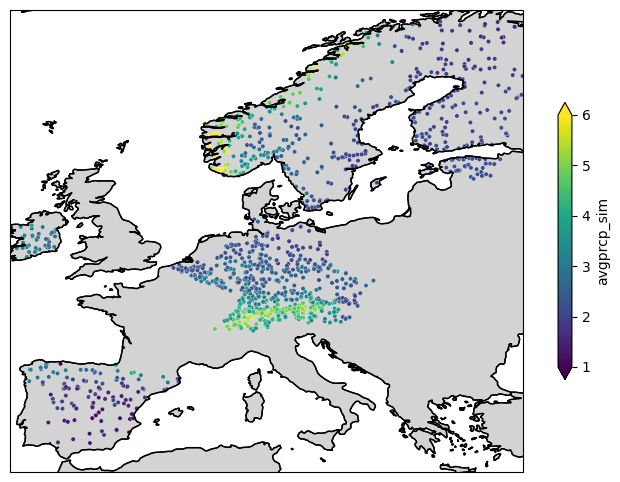

In [54]:
# Manually set the latitude and longitude extent
europe_extent = [-10, 30, 35, 70]
# Specify the index column to plot
index_column = 'avgprcp_sim'  # Replace 'NSE' with the name of your index column

# Plot the world map
plot_world_map(merged_df, index_column, europe_extent, vmin =1, vmax=6)

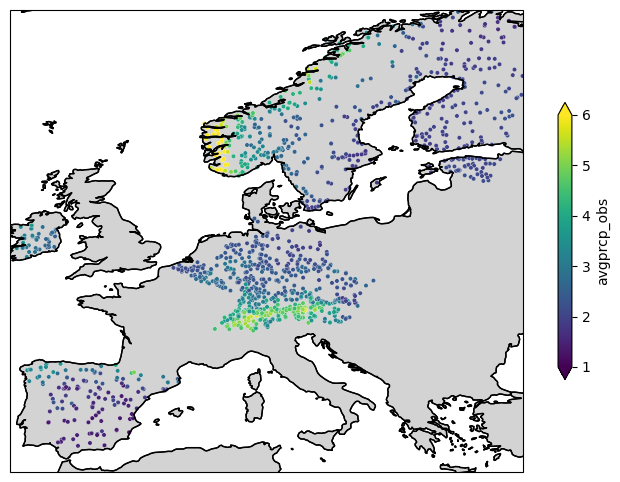

In [55]:
# Manually set the latitude and longitude extent
europe_extent = [-10, 30, 35, 70]
# Specify the index column to plot
index_column = 'avgprcp_obs'  # Replace 'NSE' with the name of your index column

# Plot the world map
plot_world_map(merged_df, index_column, europe_extent, vmin =1, vmax=6)

In [57]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_comparison_maps(simulated_df, observed_df, index_column, extent, vmin=None, vmax=None):
    # Clean the simulated and observed DataFrames by dropping NaN values in relevant columns
    simulated_df_cleaned = simulated_df.dropna(subset=['gauge_lat', 'gauge_lon', index_column + '_sim'])
    observed_df_cleaned = observed_df.dropna(subset=['gauge_lat', 'gauge_lon', index_column + '_obs'])
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

    for ax, df, suffix in zip(axes, [simulated_df_cleaned, observed_df_cleaned], ['_sim', '_obs']):
        ax.set_extent(extent)

        ax.add_feature(cfeature.LAND, color='lightgray')
        ax.add_feature(cfeature.OCEAN, color='white')
        ax.add_feature(cfeature.COASTLINE)

        index_col = index_column + suffix

        # Use the provided vmin and vmax if given, otherwise use the data range
        color_min = vmin if vmin is not None else df[index_col].min()
        color_max = vmax if vmax is not None else df[index_col].max()

        sc = ax.scatter(df['gauge_lon'], df['gauge_lat'], c=df[index_col], cmap='viridis', 
                        marker='o', transform=ccrs.PlateCarree(), vmin=color_min, vmax=color_max, s=10, edgecolors='white', linewidths=0.2)

        cbar = plt.colorbar(sc, ax=ax, shrink=0.6, extend='both')
        cbar.set_label(index_column + suffix)

        ax.coastlines()

    plt.show()


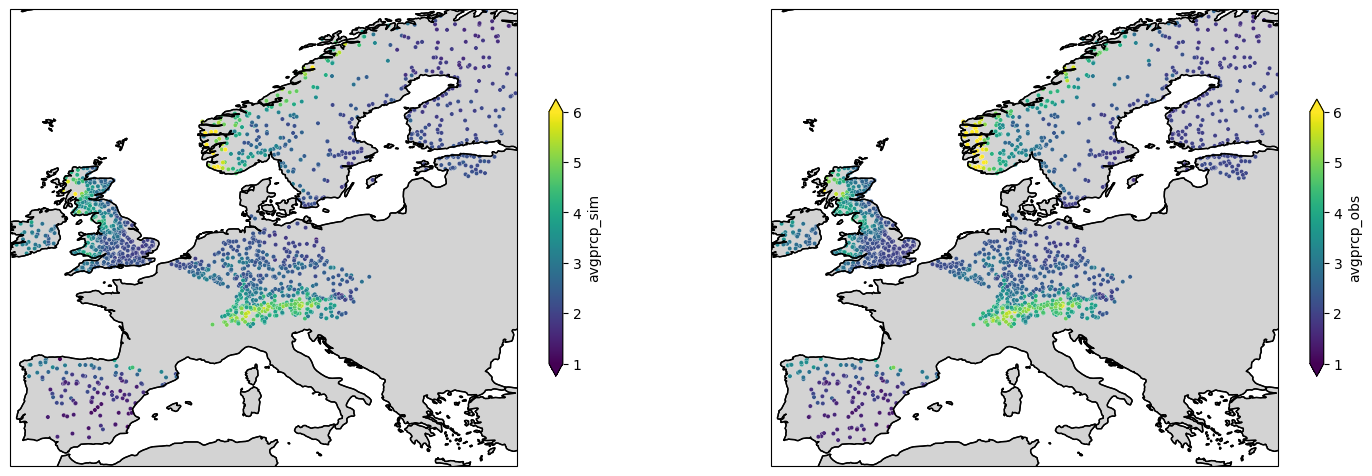

In [65]:
# Manually set the latitude and longitude extent for Europe
europe_extent = [-10, 30, 35, 70]

# Specify the index column to plot
index_column = 'avgprcp'  # Replace 'NSE' with the name of your index column

# Plot the comparison maps for simulated and observed indices
plot_comparison_maps(simulated_df=merged_df, observed_df=merged_df, index_column=index_column, extent=europe_extent,vmin = 1, vmax=6)

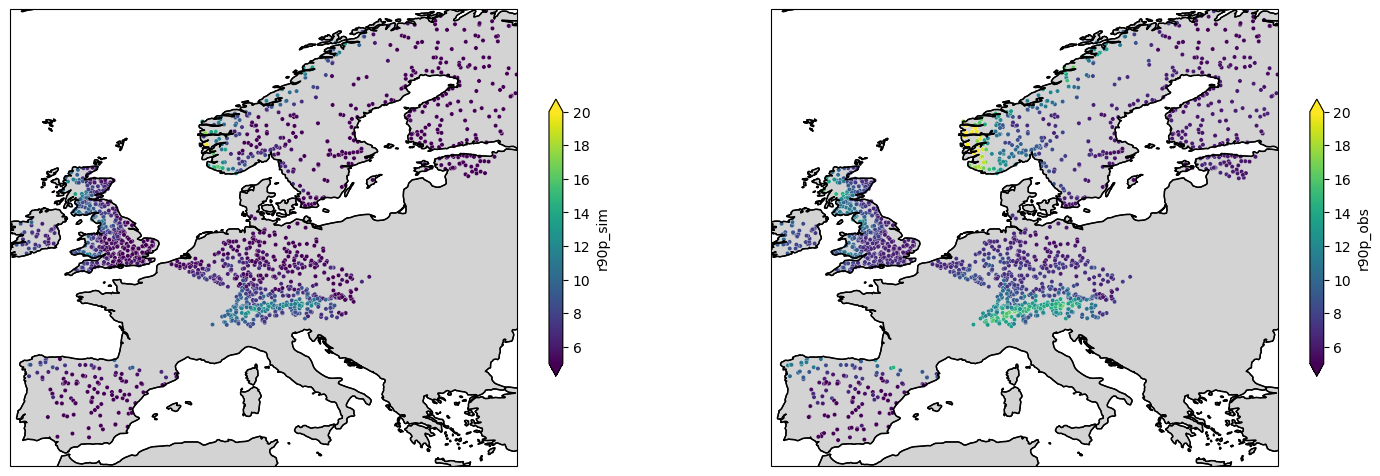

In [67]:
# Specify the index column to plot
index_column = 'r90p'  # Replace 'NSE' with the name of your index column

# Plot the comparison maps for simulated and observed indices
plot_comparison_maps(simulated_df=merged_df, observed_df=merged_df, index_column=index_column, extent=europe_extent,vmin = 5, vmax=20)

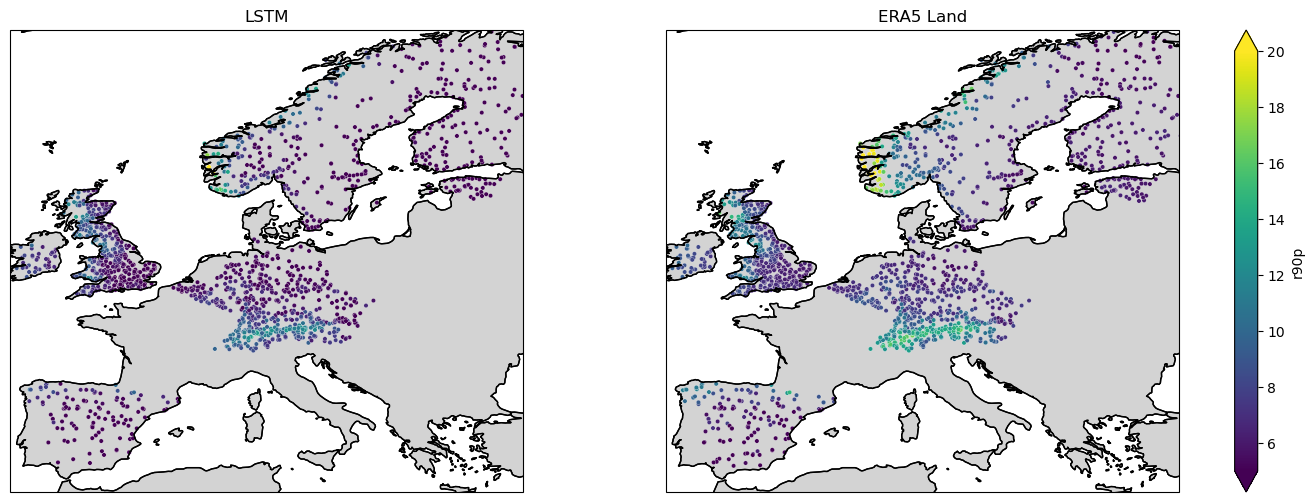

In [79]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_comparison_maps_legend(simulated_df, observed_df, index_column, extent, vmin=None, vmax=None):
    # Clean the simulated and observed DataFrames by dropping NaN values in relevant columns
    simulated_df_cleaned = simulated_df.dropna(subset=['gauge_lat', 'gauge_lon', index_column + '_sim'])
    observed_df_cleaned = observed_df.dropna(subset=['gauge_lat', 'gauge_lon', index_column + '_obs'])

    # Determine the color limits if not provided
    combined_min = min(simulated_df_cleaned[index_column + '_sim'].min(), observed_df_cleaned[index_column + '_obs'].min())
    combined_max = max(simulated_df_cleaned[index_column + '_sim'].max(), observed_df_cleaned[index_column + '_obs'].max())
    color_min = vmin if vmin is not None else combined_min
    color_max = vmax if vmax is not None else combined_max

    fig, axes = plt.subplots(1, 2, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    plt.subplots_adjust(wspace=0.0000001)
    
    titles = ['LSTM', 'ERA5 Land']
    
    for ax, df, suffix, title in zip(axes, [simulated_df_cleaned, observed_df_cleaned], ['_sim', '_obs'], titles):
        ax.set_extent(extent)

        ax.add_feature(cfeature.LAND, color='lightgray')
        ax.add_feature(cfeature.OCEAN, color='white')
        ax.add_feature(cfeature.COASTLINE)

        index_col = index_column + suffix

        sc = ax.scatter(df['gauge_lon'], df['gauge_lat'], c=df[index_col], cmap='viridis', 
                        marker='o', transform=ccrs.PlateCarree(), vmin=color_min, vmax=color_max, s=10, edgecolors='white', linewidths=0.2)

        ax.coastlines()
        
        # Add title to subplot
        ax.set_title(title)

    # Add a single colorbar for both subplots
    cbar = fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, extend='both')
    cbar.set_label(index_column)

    plt.show()

# Example function call
plot_comparison_maps_legend(merged_df, merged_df, 'r90p', europe_extent, vmin=5, vmax=20)



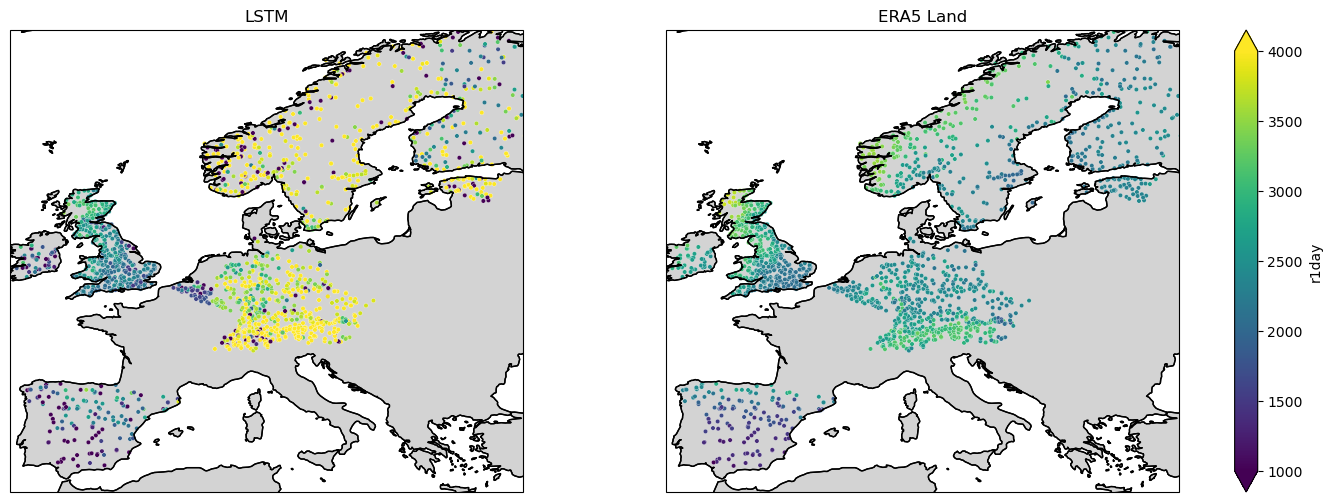

In [81]:
plot_comparison_maps_legend(merged_df, merged_df, 'r1day', europe_extent, vmin=1000, vmax=4000)